In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_wavelets.Layers.DWT as DWT
import tensorflow_wavelets.Layers.DMWT as DMWT
import tensorflow_wavelets.Layers.DTCWT as DTCWT
import tensorflow_wavelets.Layers.Activation as Activation

from tensorflow_wavelets.utils.data import *

from tensorflow.keras.optimizers import Adam, SGD

In [2]:
nb_classes = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
input_shape = (28, 28, 1)  

# optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
optimizer = SGD(lr=lr, momentum=beta_1)

(x_train, y_train), (x_test, y_test) = load_mnist(remove_n_samples=0)



C:\Users\Olya\Anaconda3\envs\test\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [3]:
# load DWT db2 model
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(DWT.DWT(wavelet_name="db2"))
model.add(Activation.Threshold(algo='sure', mode="hard"))
model.add(DWT.IDWT(wavelet_name="db2"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(nb_classes, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dwt (DWT)                    (None, 30, 30, 1)         0         
_________________________________________________________________
threshold (Threshold)        (None, 30, 30, 1)         0         
_________________________________________________________________
idwt (IDWT)                  (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [5]:
history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    )

Epoch 1/30
1500/1500 - 9s - loss: 1.8143 - accuracy: 0.5012 - val_loss: 1.3756 - val_accuracy: 0.7397
Epoch 2/30
1500/1500 - 9s - loss: 1.1907 - accuracy: 0.7626 - val_loss: 1.0023 - val_accuracy: 0.8147
Epoch 3/30
1500/1500 - 9s - loss: 0.9407 - accuracy: 0.8074 - val_loss: 0.8269 - val_accuracy: 0.8363
Epoch 4/30
1500/1500 - 9s - loss: 0.8100 - accuracy: 0.8255 - val_loss: 0.7258 - val_accuracy: 0.8501
Epoch 5/30
1500/1500 - 9s - loss: 0.7292 - accuracy: 0.8365 - val_loss: 0.6598 - val_accuracy: 0.8564
Epoch 6/30
1500/1500 - 9s - loss: 0.6737 - accuracy: 0.8451 - val_loss: 0.6127 - val_accuracy: 0.8641
Epoch 7/30
1500/1500 - 9s - loss: 0.6328 - accuracy: 0.8513 - val_loss: 0.5778 - val_accuracy: 0.8670
Epoch 8/30
1500/1500 - 9s - loss: 0.6013 - accuracy: 0.8559 - val_loss: 0.5505 - val_accuracy: 0.8703
Epoch 9/30
1500/1500 - 9s - loss: 0.5761 - accuracy: 0.8592 - val_loss: 0.5282 - val_accuracy: 0.8733
Epoch 10/30
1500/1500 - 9s - loss: 0.5554 - accuracy: 0.8628 - val_loss: 0.5098 - 

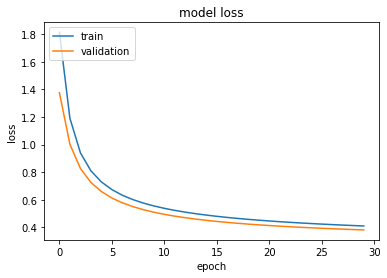

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()